# Assignment 03 Neural Networks - Exercise 2 - 301224927

Covid-19 Face Mask Detection Using Tensorflow , Keras and OpenCV

----------------------Alogrithm Approach----------------

Input  ---> dataset including faces with and without masks
Output ---> Categorized image depicting the presence of mask or not

for each image in dataset do
  visualize the image in two categorices and label them
  convert the RGB image ---> grey scale image
  resize the grey scale image into 100*100
  normalize the image and convert into 4D array
end

for building the CNN model do
  add a convolution layer of 200 filters
  add a second convocation layer to the network classifier
  insert flattern layer to the network classifier
  add a dense layer with 2 outputs for 2 categories
end

split the dataset and train the model

# Exercise 2
## Facial Recognition for Differentiating Specific Features – Using CNNs

In [23]:
#importing libraries
import numpy as np
import pandas as pd
import os,random

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#tensotflow import
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

#image import
from IPython.display import Image, display

In [24]:
import cv2 

In [25]:
## setting the axes attributes
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [26]:
# Setting random seeds
np.random.seed(301224927)
tf.random.set_seed(301224927)

Total Mask images in dataset: 5521-Total No Mask images in dataset:5521
Sample image with mask


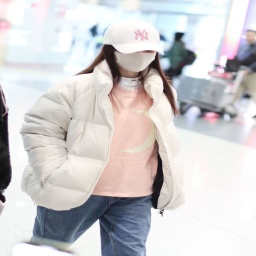

Sample image without mask


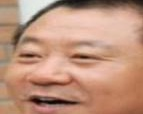

In [27]:
#Data loading and preprocessing 
#•	Transformations
#•	Standardization

mask_images = []
no_mask_images = []

#loading dataset
dataset_base_path = os.path.join(os.getcwd(), 'C://Dataset')
mask_images_paths = os.listdir(os.path.join(dataset_base_path, 'with_mask'))
mask_images_paths = [os.path.join(dataset_base_path, 'with_mask', img) for img in mask_images_paths]

# Taking without_mask category as 0 label and with mask as label 1
no_mask_images_paths = os.listdir(os.path.join(dataset_base_path, 'without_mask'))
no_mask_images_paths = [os.path.join(dataset_base_path, 'without_mask', img) for img in no_mask_images_paths]

total_mask = len(mask_images_paths)
total_no_mask = len(no_mask_images_paths)
total_imgs = total_mask + total_no_mask

print(f'Total Mask images in dataset: {total_mask}-Total No Mask images in dataset:{total_no_mask}')

# Displaying samples with mask and without mask
idxm = 1000
print('Sample image with mask')
display(Image(mask_images_paths[idxm]))
print('Sample image without mask')
display(Image(no_mask_images_paths[idxm]))  


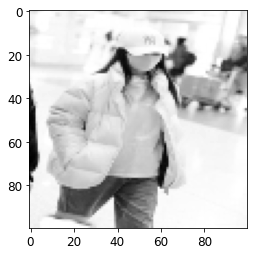

(0, 1)


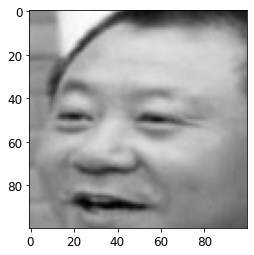

(1, 0)
Image preprocessing is complete


In [28]:
#CREATING DATASET STRUCTURES
X_path = []
y = []

# Create list of paths
# mask (0,1)  & no_mask (1,0) 

index = 0
for m in range(total_mask):
    X_path.append(mask_images_paths[m])
    y.append((0,1))
    index += 1

for n in range(total_no_mask):
    X_path.append(no_mask_images_paths[n])
    y.append((1,0))
    index += 1


# Function to create image representation
# Transforming to gray scale, resizing to 100x100 and values in range [0,1]
def preprocess_image(path):
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    final_img = cv2.resize(gray_img, (100,100))
    return final_img/255

sample = X_path[idxm]
result = preprocess_image(sample)
plt.imshow(result, cmap='gray')
plt.show()
print(y[idxm])
sample2 = X_path[idxm + 5521]
result2 = preprocess_image(sample2)
plt.imshow(result2, cmap='gray')
plt.show()
print(y[idxm + 5521])

X_pre = np.array([preprocess_image(img) for img in X_path])

# Reshape image to CNN expected format 1 channel
X_pre = np.reshape(X_pre,(X_pre.shape[0],100,100,1))
y = np.array(y)

print('Image preprocessing is complete')

In [31]:
### CREATE TRAINING, TESTING AND VALIDATION SETS

## Train - Test (90-10) as suggested in the research paper
## Train - Validation (80-20) as suggested

X_train, X_test, y_train, y_test = train_test_split(X_pre, y, train_size=0.9, random_state=301224927, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=301224927, shuffle=True)

print( f'X_train: {X_train.shape} Y_train: {y_train.shape}')
print( f'X_val: {X_val.shape} Y_val: {y_val.shape}')

X_train: (7949, 100, 100, 1) Y_train: (7949, 2)
X_val: (1988, 100, 100, 1) Y_val: (1988, 2)


In [32]:
# CNN Model
# Dataset shape = Num Imgs x 100 x 100 x 1 channel

model = keras.models.Sequential()
model.add(keras.layers.Input((100,100,1), name='Input'))
model.add(keras.layers.Conv2D(filters=200, kernel_size=3, padding='valid', activation='relu', name='Conv2D-200'))
model.add(keras.layers.MaxPool2D(pool_size=3))
model.add(keras.layers.Conv2D(filters=100, kernel_size=3, padding='valid', activation='relu', name='Conv2D-100'))
model.add(keras.layers.MaxPool2D(pool_size=3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units= 64, activation="relu", name='Dense64'))
model.add(keras.layers.Dense(units= 2, activation="softmax", name='Output'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D-200 (Conv2D)         (None, 98, 98, 200)       2000      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 200)      0         
 2D)                                                             
                                                                 
 Conv2D-100 (Conv2D)         (None, 30, 30, 100)       180100    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 100)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 Dense64 (Dense)             (None, 64)               

Epoch 1/5
249/249 [==============================] - 136s 542ms/step - loss: 0.3535 - accuracy: 0.8421 - val_loss: 0.2242 - val_accuracy: 0.9120
Epoch 2/5
249/249 [==============================] - 135s 544ms/step - loss: 0.1617 - accuracy: 0.9401 - val_loss: 0.2012 - val_accuracy: 0.9281
Epoch 3/5
249/249 [==============================] - 133s 535ms/step - loss: 0.1200 - accuracy: 0.9557 - val_loss: 0.1552 - val_accuracy: 0.9452
Epoch 4/5
249/249 [==============================] - 135s 542ms/step - loss: 0.0941 - accuracy: 0.9659 - val_loss: 0.1223 - val_accuracy: 0.9552
Epoch 5/5
35/35 [==============================] - 5s 148ms/step - loss: 0.1118 - accuracy: 0.9548


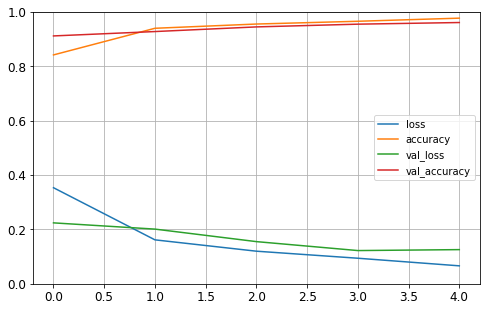

INFO:tensorflow:Assets written to: ./covid19_mask_detection_model\assets


INFO:tensorflow:Assets written to: ./covid19_mask_detection_model\assets


In [33]:
###MODEL COMPILATION AND TRAINING
#Use model_checkpoint as recommended in the reasearch paper
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./checkpoint',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Monitotring the model training and saving the best version from it
model_history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val),
                          callbacks=[checkpoint_callback])

model_score = model.evaluate(X_test, y_test)

#Plot Loss Score and Accuracy
#Analyze the accuracy of the model and point out some of the pitfalls.
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#Saving model
model.save('./covid19_mask_detection_model')

------------Analysis Report-------------

In the research paper it is indicated to use 20 ephocs for training but i this case I am using only 5 achieve high level of accuracy.
In this example I use only 5 epoches to attain the higher accuracy.
In contrast to the paper's claim that the model achieved 94.58% accuracy, the model trained here achieved 97.74% accuracy.


------------Graph Analysis Report--------

The loss and accuracy metric curves demonstrate how the model's behaviour is consistent across testing and validation sets, 
with validation yielding excellent results right away.


In [34]:
#TESTING AND DISPLAYING RESULTS

#Loading model from savefile
mask_detection_model = keras.models.load_model('./mask_detection_model')

Sample Indexs: [996, 20, 585, 179, 837, 946, 711, 434, 927, 138, 598, 926, 424, 1033, 441]
1/1 [==============================] - 0s 148ms/step


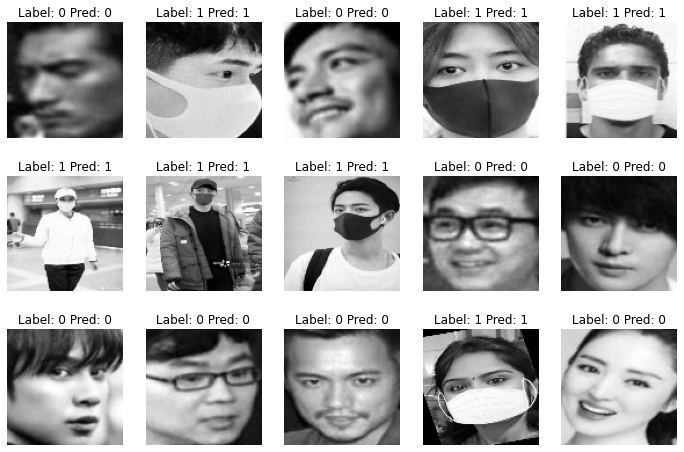

In [35]:
#Collecting and displaying sample results

rows = 3
columns = 5

sample_indexes = [random.randrange(0, len(X_test)) for _ in range(rows*columns)]
print(f'Sample Indexs: {sample_indexes}')

#extract a few samples from testing set
X_sample = X_test[sample_indexes] 
y_sample = y_test[sample_indexes]
y_pred = mask_detection_model.predict(X_sample)
y_pred = [np.argmax(p) for p in y_pred]


#displaying the results of image classification
plt.figure(figsize=(12,8))
img_index = 0
for row in range(rows):
    for col in range(columns):
        plt.subplot(rows, columns, img_index+1)
        plt.imshow(X_sample[img_index], cmap='gray')
        plt.title(f'Label: {np.argmax(y_sample[img_index])} Pred: {y_pred[img_index]}')
        plt.axis("off")
        img_index += 1
plt.show()